## EXPLORATORY DATA ANALYSIS (SITES TROVIT)
### Lien: https://homes.trovit.co.za/index.php/cod.search_homes/type.1/what_d.eastern%20cape/isUserSearch.1

## I. Introduction
Dans le compte rendu ci-dessous, nous entreprendrons l'analyse exploratoire des données (AED) du site Trovit, une plateforme regroupant des informations sur la vente de plusieurs propriétés. Notre objectif est d'explorer et de comprendre ces données afin d'en extraire des informations pertinentes, tout en procédant au nettoyage nécessaire.

### Préparation :
Pour commencer, nous importerons les bibliothèques nécessaires et téléchargerons le fichier requis pour notre analyse exploratoire des données.



In [4]:
#importation des bibliothèques 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


In [5]:
#fichier contenant les données
data = pd.read_csv('data_trovit.csv')

## II. EXPLORATORY DATA ANALYSIS   


### II-1. Examination et Compréhension des Données
Passons maintenant à l'examen approfondi et à la compréhension des données extraites du site Trovit. Cette phase cruciale de l'analyse exploratoire vise à dévoiler les caractéristiques essentielles des informations recueillies et à fournir des insights significatifs.

#### Exploration des variables :

Au cours de cette étape, nous allons identifier les variables clés, examiner la distribution des données et repérer d'éventuelles tendances ou "outliers". Cela nous permettra d'acquérir une vision plus précise de la nature des données à notre disposition.

#### Nettoyage des Données :

Parallèlement à l'examen, nous effectuerons le nettoyage des données. Cette phase implique la détection et la correction d'éventuelles erreurs, valeurs aberrantes ou lacunes dans les données, garantissant ainsi la fiabilité de notre analyse.

In [6]:
#copie des données sur laquelle on va travailler 
df=data.copy()

In [7]:
df.head()

,uid,region,city,property_type,price,bedrooms,bathrooms,size
0,1f1b8A1v1skf655345d5c3f3e,Eastern Cape,East London,Homes,650000.0,3.0,1.0,NaN
1,1c61t1zGV1H1A655345d5c454c,Nelson Mandela Bay,nelson mandela bay,Homes,2200000.0,3.0,3.0,NaN
2,1-v1Yh9Pw1655345d5c4a74,Eastern Cape,East London,Homes,780000.0,2.0,1.0,NaN
3,1U1m1Zv1p1c1Q1_655345d5c4f9e,Nelson Mandela Bay,nelson mandela bay,Homes,2200000.0,2.0,2.0,NaN
4,1tyg1Ttc1v1D655345d5c548d,Eastern Cape,East London,House,4500000.0,8.0,6.0,NaN


### 1. Analyse du dataframe

In [8]:
 df.shape

(2500, 8)

In [9]:
df.dtypes.value_counts()

object     4
float64    4
dtype: int64

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            2500 non-null   object 
 1   region         2500 non-null   object 
 2   city           2500 non-null   object 
 3   property_type  2499 non-null   object 
 4   price          2488 non-null   float64
 5   bedrooms       2061 non-null   float64
 6   bathrooms      2065 non-null   float64
 7   size           745 non-null    float64
dtypes: float64(4), object(4)
memory usage: 156.4+ KB


Il est important de préciser que notre objectif principal réside dans l'analyse des prix des propriétés. À la lumière des informations actuelles, il devient apparent que certaines variables présentent un nombre significatif de valeurs manquantes. Nous débuterons donc par une analyse approfondie des variables, puis nous explorerons les relations entre elles afin de mieux appréhender les valeurs manquantes. Cette approche nous permettra de déterminer la meilleure stratégie à adopter face à ces valeurs manquantes.


### 2-1 . Analyse des variables:

#### 2-1-1 . Analyse du variable cible (le prix):

In [11]:
df['price'].value_counts()

650000.0      37
450000.0      35
1950000.0     30
750000.0      30
850000.0      28
              ..
969000.0       1
7999000.0      1
5290000.0      1
12690000.0     1
462000.0       1
Name: price, Length: 594, dtype: int64

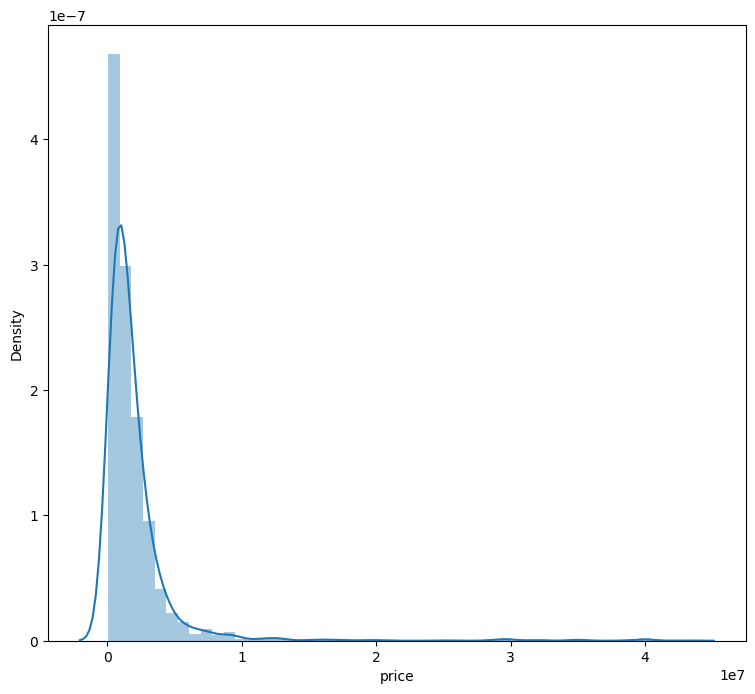

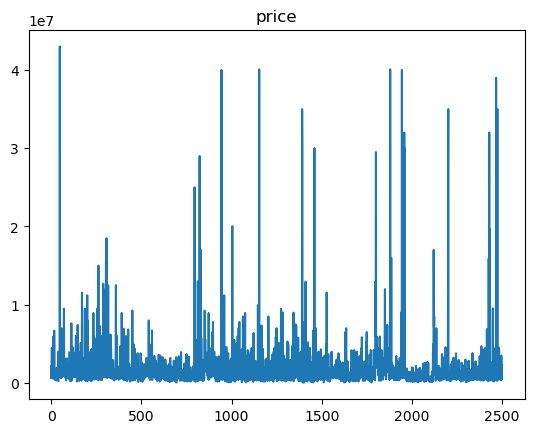

In [12]:
df['price'].describe()
plt.figure(figsize=(9,8))
sns.distplot(df['price'])

plt.figure()
plt.plot(df['price'])
plt.title("price")
plt.show()


En analysant ces données, nous observons une asymétrie à droite dans la distribution des prix des propriétés. De plus, il est à noter la présence de certains "outliers" significatifs, localisés aux alentours de 50 000 000 R (unité monétaire).

#### 2-3 . Analyse des caratéristique(features) et nettoyage des données :

Suite à cette observation, il est évident que la colonne "uid" ne revêt pas une importance significative pour notre analyse de données. Par conséquent, il serait judicieux de procéder à l'élimination de cette colonne.


In [13]:
# elimination du colonne "uid " car il sert à rien dans notre analyse
df = df.drop('uid',axis=1)

region ['Eastern Cape' 'Nelson Mandela Bay' 'King Sabata Dalindyebo' 'Gauteng'
 'Walter Sisulu' 'Northern Cape' 'Western Cape']
city ['East London' 'nelson mandela bay' 'Eastern Cape' 'cacadu' 'Jeffreys Bay'
 'Cape St Francis' 'Pretoria' 'joe gqabi' 'Port Alfred' 'Johannesburg'
 'Port Elizabeth' 'Boesmansriviermond' 'Alexandria' 'Bathurst' 'Uitenhage'
 'Humansdorp' 'Butterworth' 'St Francis Bay' 'Begha' 'Kenton on Sea'
 'Oesterbaai' 'Joubertina' 'Despatch' 'Paarl' 'George' 'Cathcart'
 'Grahamstown' 'Mthatha' 'Adelaide' 'Colchester' 'Bhisho' 'Middelburg'
 'Peddie' 'Bedford' 'Hogsback' 'Stutterheim' 'Queenstown'
 'Amatola Coastal' 'Thornhill' 'Tarkastad' 'Aberdeen' 'Willowmore'
 'Steynsburg' 'Elliot' 'Cradock' 'Sterkstroom' 'Komga' 'Steytlerville'
 'Graaff-Reinet' 'Kirkwood' 'Ugie' 'Jansenville' 'Somerset East'
 'Pearston' 'Seymour' 'Fort Beaufort' 'Hankey' 'Kareedouw' 'Macleantown'
 'King William’s Town' 'Port St Johns']
property_type ['Homes' 'House' 'house' 'Flat' 'land' 'Townhouse' '

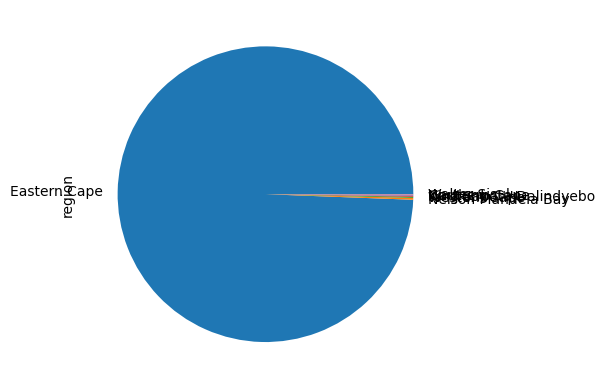

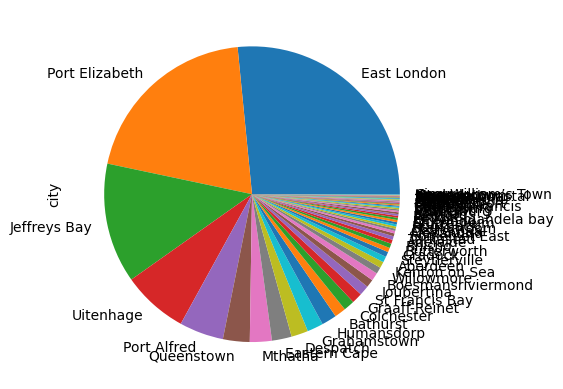

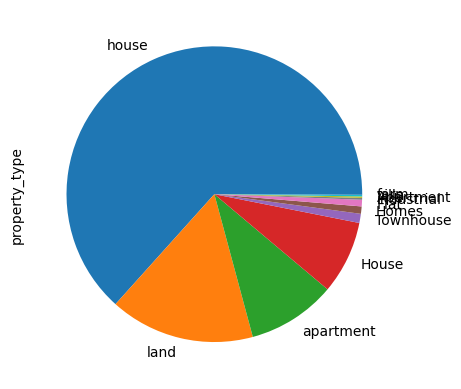

In [14]:
for col in df.select_dtypes('object'):
    print(col, df[col].unique())
    plt.figure()
    df[col].value_counts().plot.pie()

En ce qui concerne la région, on a noté que la plupart des données se situent dans "Eastern Cape". De plus, d'après les informations disponibles sur le site, la recherche semble se concentrer principalement dans la région "Eastern Cape". Il semble donc que les données d'autres régions ne soient pas particulièrement nécessaires. Cependant, à la lumière de quelques recherches supplémentaires, des données spécifiques de certaines villes de l'Eastern Cape, telles que "Nelson Mandela Bay" et "King Sabata Dalindyebo","Walter Sisulu", semblent pertinentes, nous allons donc les conserver.

In [15]:
df = df[df["region"].isin(["Eastern Cape", "Nelson Mandela Bay", "King Sabata Dalindyebo","Walter Sisulu"])]
df["region"].unique()

array(['Eastern Cape', 'Nelson Mandela Bay', 'King Sabata Dalindyebo',
       'Walter Sisulu'], dtype=object)

Passons maintenant à l'analyse de la colonne 'property_type'.

In [16]:
df['property_type'].unique()

array(['Homes', 'House', 'house', 'Flat', 'land', 'Townhouse',
       'Apartment', 'apartment', nan, 'villa', 'industrial', 'farm'],
      dtype=object)

On remarque une redondance de noms de variables dans cette colonne, ce qui pourrait être attribué à une seule variable. Par exemple, "house", "House", "apartment" et "Apartment" pourraient être regroupés en une seule catégorie.


In [17]:
df["property_type"] = df["property_type"].replace({"house": "House"})
df["property_type"] = df["property_type"].replace({"apartment": "Apartment"})
df['property_type'].unique()

array(['Homes', 'House', 'Flat', 'land', 'Townhouse', 'Apartment', nan,
       'villa', 'industrial', 'farm'], dtype=object)

<Axes: >

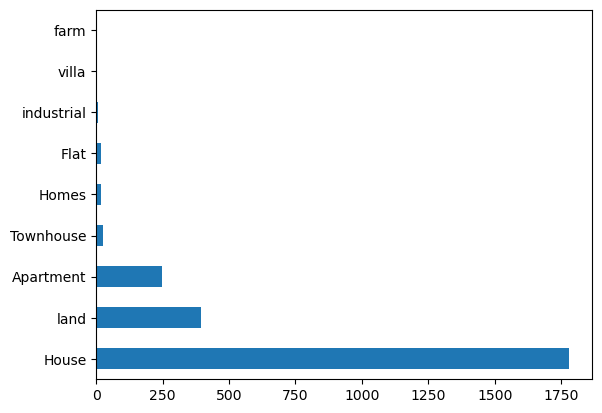

In [18]:
df['property_type'].value_counts().plot(kind="barh")

On note que la plupart des propriétés sont de types "Houses". Tandis le nombre de propriétés de type "industrial", "villa", et "farm" est négligeable.Cependant, nous ne les éliminerons pas, car elles pourraient encore s'avérer utiles ultérieurement.

In [19]:
 df['city'].unique()

array(['East London', 'nelson mandela bay', 'Eastern Cape', 'cacadu',
       'Jeffreys Bay', 'Cape St Francis', 'joe gqabi', 'Port Alfred',
       'Port Elizabeth', 'Boesmansriviermond', 'Alexandria', 'Bathurst',
       'Uitenhage', 'Humansdorp', 'Butterworth', 'St Francis Bay',
       'Begha', 'Kenton on Sea', 'Oesterbaai', 'Joubertina', 'Despatch',
       'Cathcart', 'Grahamstown', 'Mthatha', 'Adelaide', 'Colchester',
       'Bhisho', 'Middelburg', 'Peddie', 'Bedford', 'Hogsback',
       'Stutterheim', 'Queenstown', 'Amatola Coastal', 'Thornhill',
       'Tarkastad', 'Aberdeen', 'Willowmore', 'Steynsburg', 'Elliot',
       'Cradock', 'Sterkstroom', 'Komga', 'Steytlerville',
       'Graaff-Reinet', 'Kirkwood', 'Ugie', 'Jansenville',
       'Somerset East', 'Pearston', 'Seymour', 'Fort Beaufort', 'Hankey',
       'Kareedouw', 'Macleantown', 'King William’s Town', 'Port St Johns'],
      dtype=object)

<Axes: title={'center': 'city'}>

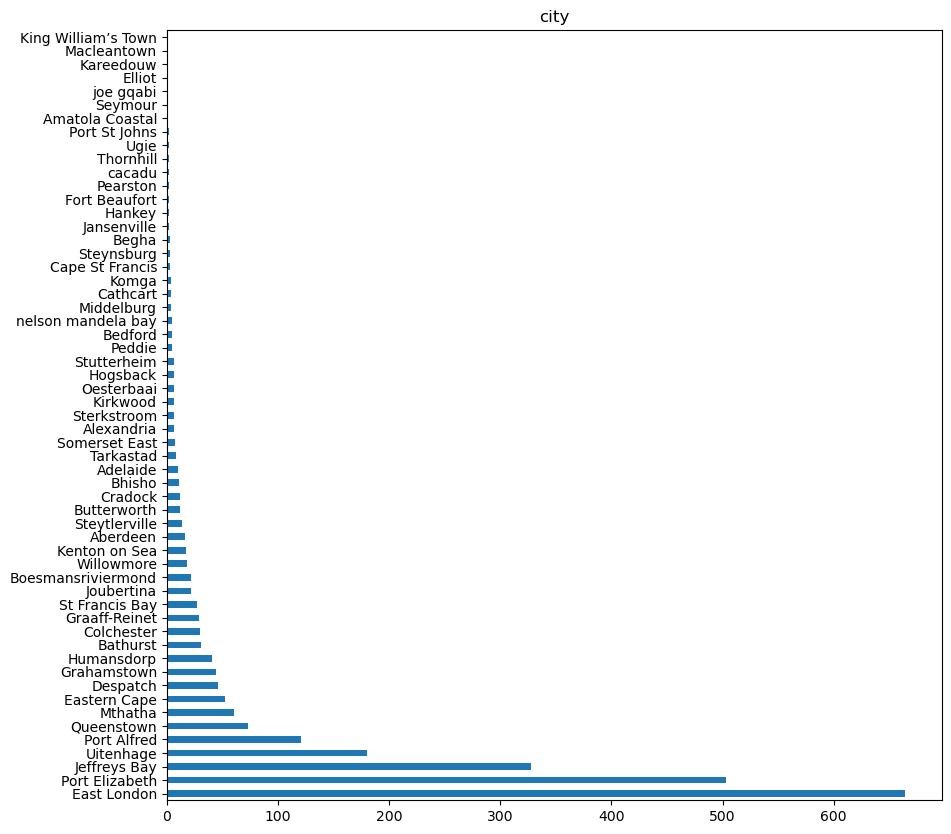

In [20]:
plt.figure(figsize=(10, 10))
plt.title("city")
df['city'].value_counts().plot(kind="barh")

Il est notable que la majorité des propriétés sont concentrées à East London, tandis que d'autres sont réparties de manière plus équilibrée dans la moyenne. Cependant, il est à noter que certaines propriétés présentent des nombres assez négligeables par rapport à d'autres.



#### 2-3 . Analyse des valeurs manquantes:

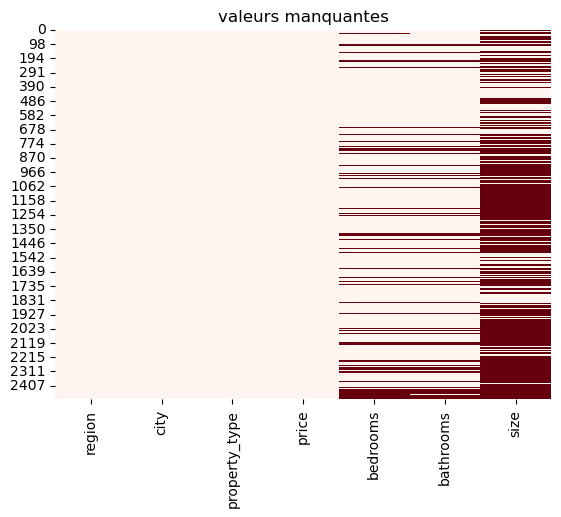

In [21]:
sns.heatmap(df.isna(),cmap='Reds',cbar=False)
plt.title('valeurs manquantes')
plt.show()

In [22]:
#mesurer le pourcentage de valeur manquantes
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

size             0.703169
bedrooms         0.175692
bathrooms        0.174489
price            0.004813
property_type    0.000401
region           0.000000
city             0.000000
dtype: float64

On observe que la colonne "size" présente plus de 70% de valeurs manquantes, ce qui signifie que seulement 30% de données sont disponibles dans cette colonne. Par conséquent, nous envisageons d'éliminer cette colonne.

In [23]:
df= df[df.columns[df.isna().sum()/df.shape[0] < 0.7]]
df

,region,city,property_type,price,bedrooms,bathrooms
0,Eastern Cape,East London,Homes,650000.0,3.0,1.0
1,Nelson Mandela Bay,nelson mandela bay,Homes,2200000.0,3.0,3.0
2,Eastern Cape,East London,Homes,780000.0,2.0,1.0
3,Nelson Mandela Bay,nelson mandela bay,Homes,2200000.0,2.0,2.0
4,Eastern Cape,East London,House,4500000.0,8.0,6.0
...,...,...,...,...,...,...
2495,Eastern Cape,St Francis Bay,House,3495000.0,3.0,4.0
2496,Eastern Cape,Jeffreys Bay,land,462000.0,NaN,NaN
2497,Eastern Cape,Port Elizabeth,House,1699000.0,4.0,NaN
2498,Eastern Cape,Somerset East,House,1600000.0,NaN,NaN


#### 2-4 .Analyse de relations entre les variables :

#### Entre bathrooms et bedrooms:

              price  bedrooms  bathrooms
price      1.000000  0.357581   0.575929
bedrooms   0.357581  1.000000   0.686956
bathrooms  0.575929  0.686956   1.000000


<Axes: >

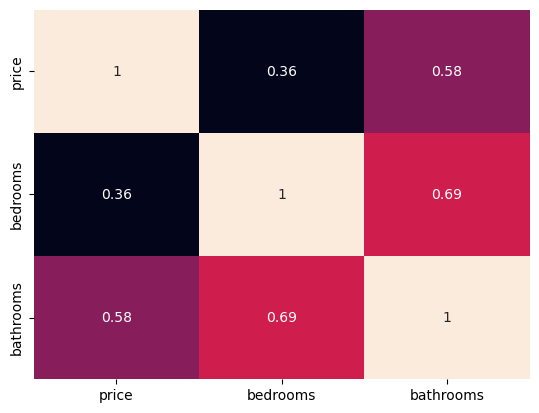

In [24]:
correlation = df.corr()
print(correlation)
sns.heatmap(correlation, annot=True,cbar=False)

Nous notons une corrélation positive significative, atteignant jusqu'à 69%, entre le nombre de salles de bains et le nombre de chambres.Cela pourrait s'avérer utiles ultérieurement.

#### Entre les city et property_type

In [31]:
table= pd.crosstab(df['property_type'], df['city'])
print(table )

city           Aberdeen  Adelaide  Alexandria  Amatola Coastal  Bathurst  \
property_type                                                              
Apartment             0         0           0                0         0   
Flat                  0         0           0                0         0   
Homes                 0         0           0                0         0   
House                 4         8           6                1        20   
Townhouse             0         0           0                0         1   
farm                  0         0           0                0         0   
industrial            0         0           0                0         0   
land                 12         2           0                0        10   
villa                 0         0           0                0         0   

city           Bedford  Begha  Bhisho  Boesmansriviermond  Butterworth  ...  \
property_type                                                           ...   
Apart


Le tableau de contingence fournit une vue détaillée de la distribution des différents types de propriétés dans diverses villes. Les types de propriétés comprennent des catégories telles que "Apartment" , "House" , "Land", et d'autres, tandis que les villes couvrent un éventail géographique, de "Aberdeen" à "Nelson Mandela Bay".

Une concentration notable de maisons est observée dans plusieurs villes, avec des points chauds à Bedford, Bhisho, Boesmansriviermond, Butterworth, et d'autres.


#### Entre bedrooms et price:

In [26]:
price_column = df["price"]
region_column = df["bedrooms"]
correlation = price_column.corr(region_column)
print(correlation)

0.35758137443359983


Une corrélation de 0,35 entre les colonnes "price" et "bedrooms" indique une corrélation positive modérée. Cela signifie qu'il existe une relation positive entre le prix d'une propriété et le nombre de chambres qu'elle possède. En d'autres termes, les propriétés avec plus de chambres sont généralement plus chères que les propriétés avec moins de chambres.

Plus précisément, une corrélation de 0.35798549812403435 signifie que 36 % de la variation du prix d'une propriété peut être expliquée par la variation du nombre de chambres. Cela signifie que si le nombre de chambres d'une propriété augmente de 1, le prix de la propriété est susceptible d'augmenter de 0.35798549812403435.


#### Entre bathrooms et price:

In [27]:
price_column = df["price"]
region_column = df["bathrooms"]
correlation = price_column.corr(region_column)
print(correlation)

0.5759291188940454


De même pour la salle de bain , la corrélation entre les colonnes "price" et "bathrooms" est de 0,6394, ce qui indique une forte corrélation positive. Cela signifie qu'il existe une relation positive entre le prix d'un bien immobilier et le nombre de salles de bain qu'il possède. En d'autres termes, les propriétés dotées d'un plus grand nombre de salles de bain sont généralement plus chères que celles dotées d'un nombre restreint de salles de bain.


Plus précisément, une corrélation de 0.5757973096723056 signifie que environ 58 % de la variation du prix d'une propriété peut être expliquée par la variation du nombre de salles de bain. Cela signifie que si le nombre de salles de baind'une propriété augmente de 1, le prix de la propriété est susceptible d'augmenter de 0.5757973096723056.


#### Entre city et price:

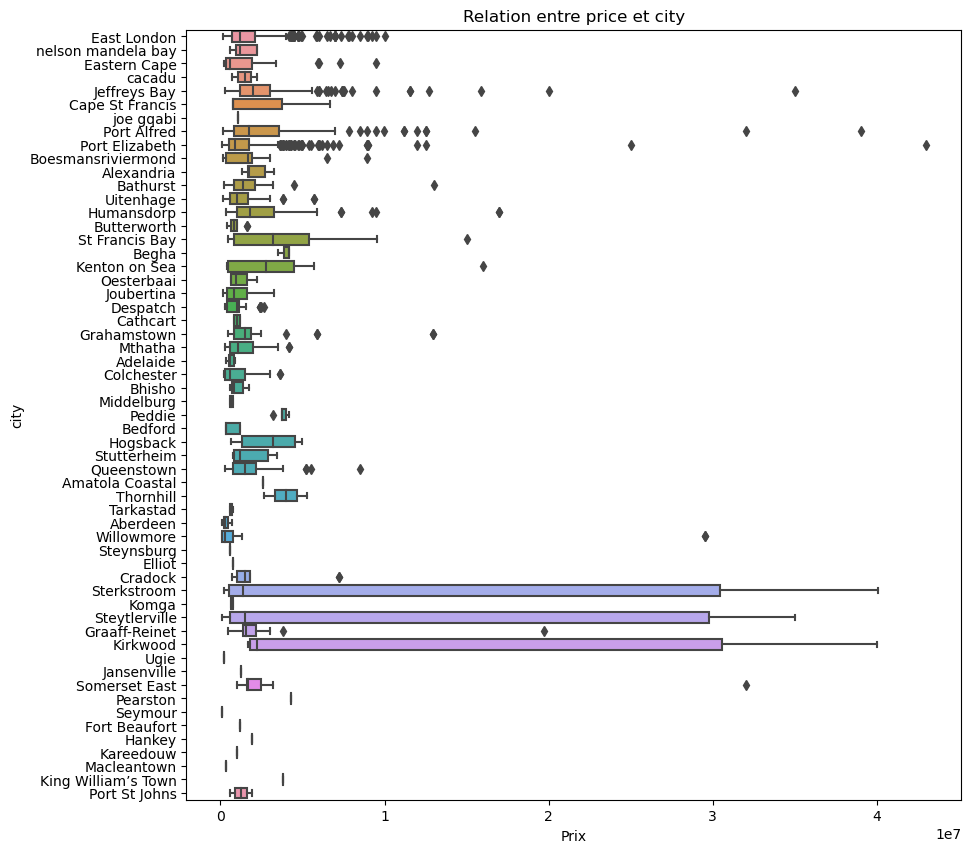

In [28]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df ,x="price", y="city")
plt.xlabel("Prix")
plt.ylabel("city")
plt.title("Relation entre price et city")
plt.show()

On observe que les prix varient en fonction de la ville où la propriété est située. Cette fluctuation peut être attribuée en partie aux types de propriétés présents dans chaque ville. Cependant, il est à noter la présence de nombreuses anomalies dans certaines villes, où certaines propriétés affichent des prix particulièrement élevés.

#### Entre property_type et price:

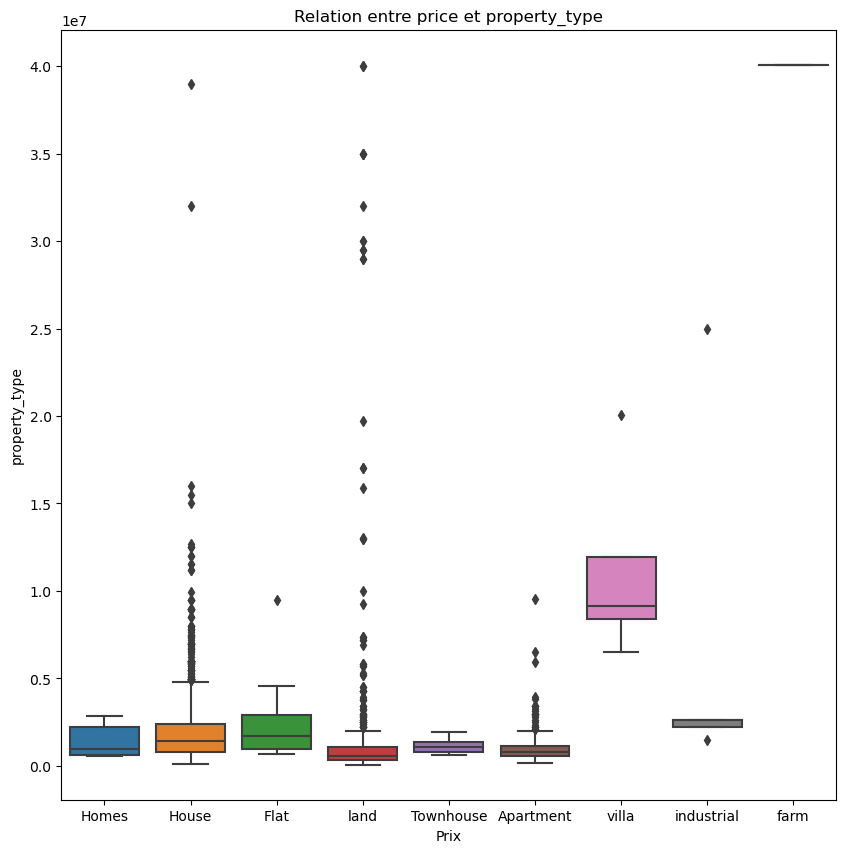

In [29]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df ,x="property_type", y="price")
plt.xlabel("Prix")
plt.ylabel("property_type")
plt.title("Relation entre price et property_type")
plt.show()

Parmi les différents types de propriétés, c'est dans la catégorie "Houses" que l'on trouve les biens les plus chers, tandis que d'autres se situent dans une fourchette de prix moyenne. Apparemment, les "townhouses" affichent des prix relativement bas. En ce qui concerne les villas, les propriétés industrielles et les fermes, il est difficile de tirer des conclusions claires sur leurs prix.

## III.Conclusion:
En conclusion, notre analyse exploratoire des données sur le site Trovit a révélé plusieurs aspects intéressants. La variabilité des prix des propriétés est fortement influencée par des facteurs tels que le nombre de chambres, de salles de bains, l'emplacement, et le type de propriété. Certains types de propriétés, notamment les maisons, se distinguent par des prix plus élevés, tandis que d'autres, comme les townhouses, affichent des prix plus abordables.

L'examen approfondi de chaque variable a permis d'optimiser la disposition des données dans le tableau et d'éliminer des colonnes non influentes, telles que "uid" et "size". De plus, nous avons noté une corrélation positive significative, atteignant jusqu'à 69%, entre le nombre de salles de bains et le nombre de chambres.


Cette approche nous a permis de tirer des conclusions et d'obtenir des informations pertinentes sur nos variables.

---